# Data Exploration, Preprocessing and EDA
## Data Exploration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
df = pd.read_parquet('n_forecast.parquet', engine='pyarrow', dtype_backend='numpy_nullable')

In [3]:
df.sample(10)

,sales_date,store_hashed,n_transactions,store_format,zipcode_region,region,holiday_saint_nicholas,holiday_first_christmas,holiday_liberation_day,holiday_good_friday,...,holiday_eid_al_fitr,holiday_valentines_day,autumn_school_holiday,summer_school_holiday,spring_school_holiday,christmas_school_holiday,may_school_holiday,easter_school_holiday,datetime_store_open,datetime_store_closed
444732,2019-08-09,0424d20160a6a558e5bf86a7bc9b67f0,9937,19,21,north,0,0,0,0,...,0,0,0,1,0,0,0,0,2019-08-09 08:00:00,2019-08-09 22:00:00
691567,2022-07-27,d4ec33c0c23ae3c91764fcc625108a5a,3266,16,31,middle,0,0,0,0,...,0,0,0,1,0,0,0,0,2022-07-27 00:01:00,2022-07-27 23:58:00
171261,2021-05-12,81e3225c6ad49623167a4309eb4b2e75,3663,16,34,middle,0,0,0,0,...,0,0,0,0,0,0,0,0,2021-05-12 00:01:00,2021-05-12 23:59:00
497690,2021-12-21,62d90d223cf3e2239113a4963b191d71,2777,19,21,north,0,0,0,0,...,0,0,0,0,0,0,0,0,2021-12-21 07:00:00,2021-12-21 20:00:00
643312,2021-06-20,e992111e4ab9985366e806733383bd8c,443,19,17,north,0,0,0,0,...,0,0,0,0,0,0,0,0,2021-06-20 08:00:00,2021-06-20 19:00:00
634524,2022-12-31,fce34b6aef091b6fb2032870279690f8,6932,19,95,north,0,0,0,0,...,0,0,0,0,0,1,0,0,2022-12-31 07:00:00,2022-12-31 18:00:00
716585,2021-05-30,b448d8292fd27ae25bbc2e09ad43ff88,1971,16,23,middle,0,0,0,0,...,0,0,0,0,0,0,0,0,2021-05-30 08:30:00,2021-05-30 23:59:00
170877,2021-04-02,c0826819636026dd1f3674774f06c51d,3303,6,14,north,0,0,0,1,...,0,0,0,0,0,0,0,0,2021-04-02 08:00:00,2021-04-02 22:00:00
563510,2019-09-22,c8ba76c279269b1c6bc8a07e38e78fa4,3143,6,37,middle,0,0,0,0,...,0,0,0,0,0,0,0,0,2019-09-22 12:00:00,2019-09-22 18:00:00
492121,2020-06-04,e4873aa9a05cc5ed839561d121516766,6235,19,43,south,0,0,0,0,...,0,0,0,0,0,0,0,0,2020-06-04 07:00:00,2020-06-04 21:00:00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737432 entries, 0 to 737431
Data columns (total 44 columns):
 #   Column                                 Non-Null Count   Dtype         
---  ------                                 --------------   -----         
 0   sales_date                             737432 non-null  object        
 1   store_hashed                           737432 non-null  string        
 2   n_transactions                         737432 non-null  Int32         
 3   store_format                           737432 non-null  Int32         
 4   zipcode_region                         737432 non-null  string        
 5   region                                 737432 non-null  string        
 6   holiday_saint_nicholas                 737432 non-null  Int32         
 7   holiday_first_christmas                737432 non-null  Int32         
 8   holiday_liberation_day                 737432 non-null  Int32         
 9   holiday_good_friday                    737432 no

In [5]:
df.nunique()

sales_date                                1461
store_hashed                               595
n_transactions                           20572
store_format                                 4
zipcode_region                              86
region                                       3
holiday_saint_nicholas                       2
holiday_first_christmas                      2
holiday_liberation_day                       2
holiday_good_friday                          2
holiday_new_years_day                        2
holiday_mothers_day                          2
holiday_fathers_day                          2
holiday_carnaval                             2
holiday_easter                               2
holiday_pentecost                            2
holiday_kings_day_netherlands                2
holiday_kings_day_belgium                    1
holiday_all_saints_day                       2
holiday_all_souls_day                        1
holiday_penance_and_prayer_day               2
holiday_germa

In [6]:
df.isnull().sum()

sales_date                                 0
store_hashed                               0
n_transactions                             0
store_format                               0
zipcode_region                             0
region                                     0
holiday_saint_nicholas                     0
holiday_first_christmas                    0
holiday_liberation_day                     0
holiday_good_friday                        0
holiday_new_years_day                      0
holiday_mothers_day                        0
holiday_fathers_day                        0
holiday_carnaval                           0
holiday_easter                             0
holiday_pentecost                          0
holiday_kings_day_netherlands              0
holiday_kings_day_belgium                  0
holiday_all_saints_day                     0
holiday_all_souls_day                      0
holiday_penance_and_prayer_day             0
holiday_german_unity_day                   0
holiday_la

In [7]:
# Check for duplicates
df.duplicated().sum()

0

## Data-Preprocessing
In the dataset there are:

| Feature | Description |
| --- | --- |
| sales_date | 1461 Days|
| store_hashed | 595 Stores|
| store_format | 4 store format|
| zipcode_region | 86 zipcode regions |
| region | 3 regions|

### Data Types
`sales_date` is object type. We will convert it to datetime type.

### Columns to Drop
In the holidays columns there are some columns that they are always 0. 
Thus, we will drop the following columns from the data:
* holiday_kings_day_belgium
* holiday_all_souls_day
* holiday_flemish_community_day
* holiday_german_speaking_community_day
* holiday_wallonie_brussel_day
* easter_school_holiday

### Duplicates
There are no duplicates in the dataset.

### Missing Values
Also, from a first look at the data, we can see that there are 2 columns with missing values: 
<!-- Table -->
| Column Name | Number of Missing Values |
| --- | --- |
| `datetime_store_open`    |619|
| `datetime_store_closed`  |611|


There are several ways to handle those missing values.
1. Drop the rows with missing values. In that case we would lose 619 rows out of 737432 which is ~0.084% of the data.

2. Fill the missing values with interpolation or ffill method. Those methods are take in account the temporal order of observations. It can influenced also from outliers. In our case, we will not use this method because we don't have any information about the missing values.

3. Another way to fill the missing data, is to consider the other columns of the dataset. We will filter the dataset by the `store_hashed`, `store_format`, `region` and `zipcode_region` and then fill the missing values with the median of the filtered data.


### Handling Missing Data In Time Series
Missing Data Imputation in Time Series

1. Data without trend and withoud seasonality -> fill with mean, median, mode and random sample imputation
2. Data with trend and without seasonality -> fill with linear interpolation
3. Data with trend and with seasonality -> Seasonal adjustment and interpolation.

    

### Interpolation:
Interpolation involves estimating missing values based on the values of neighboring data points. It's particularly useful when dealing with time-series data, as it takes into account the temporal order of observations. In your case, if you have time-related data like opening and closing hours, interpolation could provide a reasonable estimate of missing values by considering the trend over time.

Interpolation can preserve the general shape of the distribution and can be sensitive to the order of values. However, it can also be influenced by outliers, and the specific method of interpolation (linear, cubic, etc.) can impact the results. It might lead to a smoother distribution compared to using methods like median or minimum, but the extent of change would still depend on the data characteristics.

In [8]:
# Convert sales_date column to datetime
df['sales_date'] = pd.to_datetime(df['sales_date'])

In [9]:
# Drop Columns
drop_cols = ['holiday_kings_day_belgium', 'holiday_all_souls_day', 'holiday_flemish_community_day', 'holiday_german_speaking_community_day', 'holiday_wallonie_brussel_day', 'easter_school_holiday']
df.drop(drop_cols, axis=1, inplace=True)

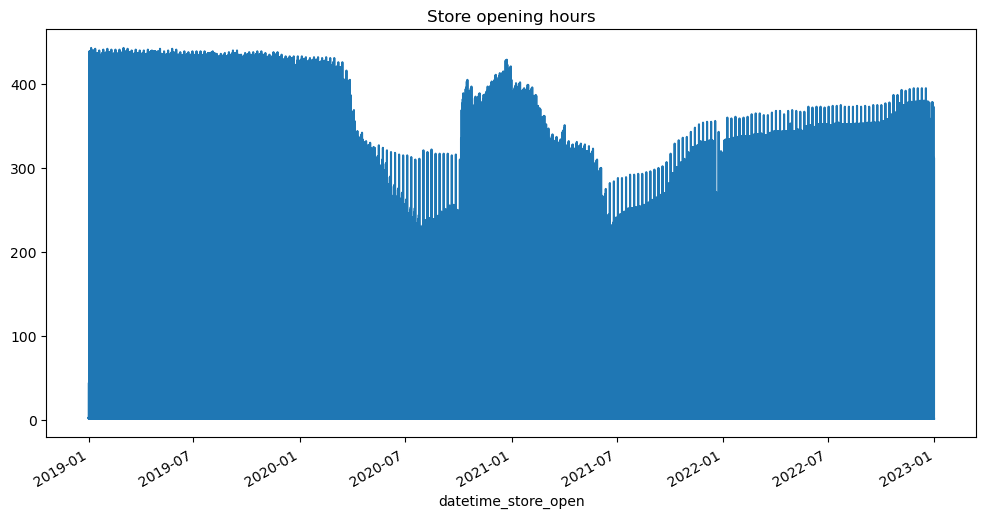

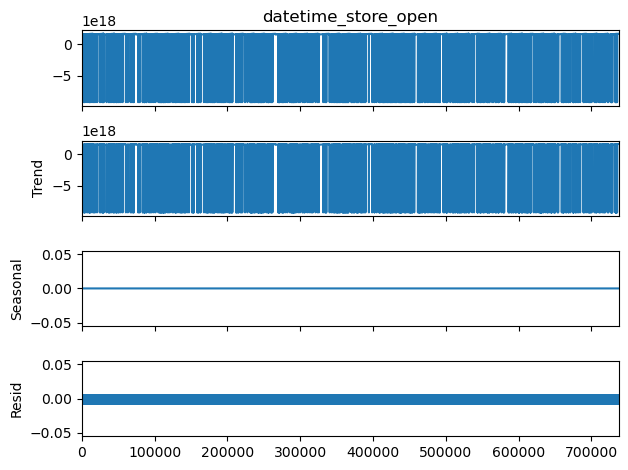

In [10]:
# Vizualize the open and closed hours time series
df['datetime_store_open'].value_counts().sort_index().plot(figsize=(12, 6), title='Store opening hours')
plt.show()

result = seasonal_decompose(df['datetime_store_open'], model='additive', period=1)
result.plot()
plt.show()

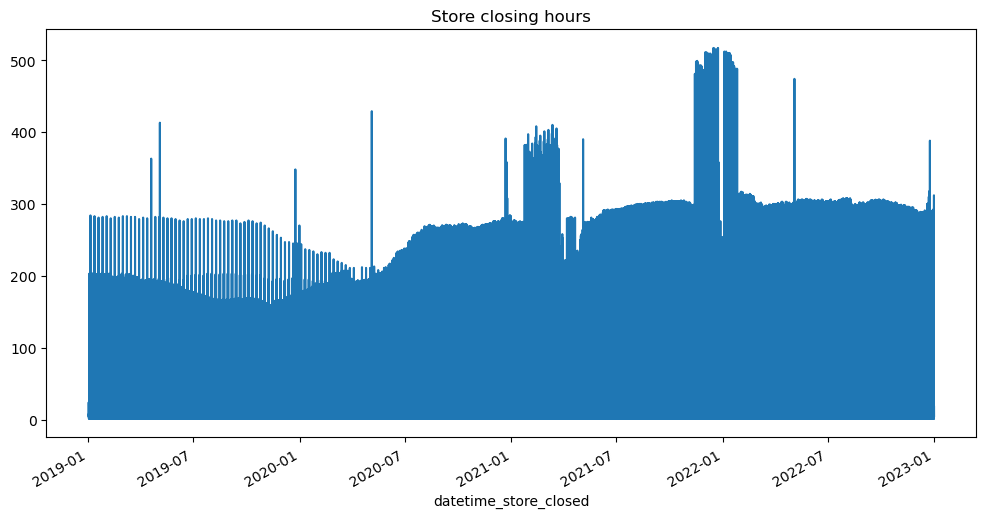

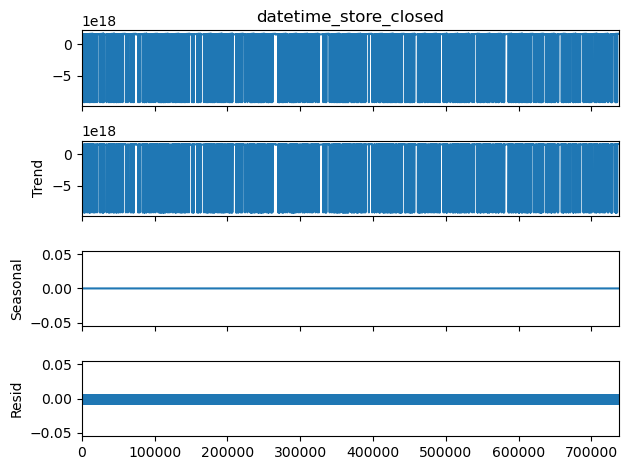

In [11]:
# Vizualize the open and closed hours time series
df['datetime_store_closed'].value_counts().sort_index().plot(figsize=(12, 6), title='Store closing hours')
plt.show()


result = seasonal_decompose(df['datetime_store_closed'], model='additive', period=1)
result.plot()
plt.show()

The datetime_store_open and datetime_store_closed features, don't have trend or seasonality. Thus, we will fill the missing values with the median of the filtered data.

## Use Interpolation to fill the missing values.

In [12]:
# Store the open_time_before and open_time_after in a DataFrame
open_time_before = df['datetime_store_open'].dt.hour 
closed_time_before = df['datetime_store_closed'].dt.hour


In [13]:
# Fill missing values with interpolated values
df_interpolated = df.copy()

df_interpolated['datetime_store_open'].interpolate(inplace=True)
df_interpolated['datetime_store_closed'].interpolate(inplace=True)

In [14]:
open_time_after_interpolate = df_interpolated['datetime_store_open'].dt.hour
closed_time_after_interpolate = df_interpolated['datetime_store_closed'].dt.hour

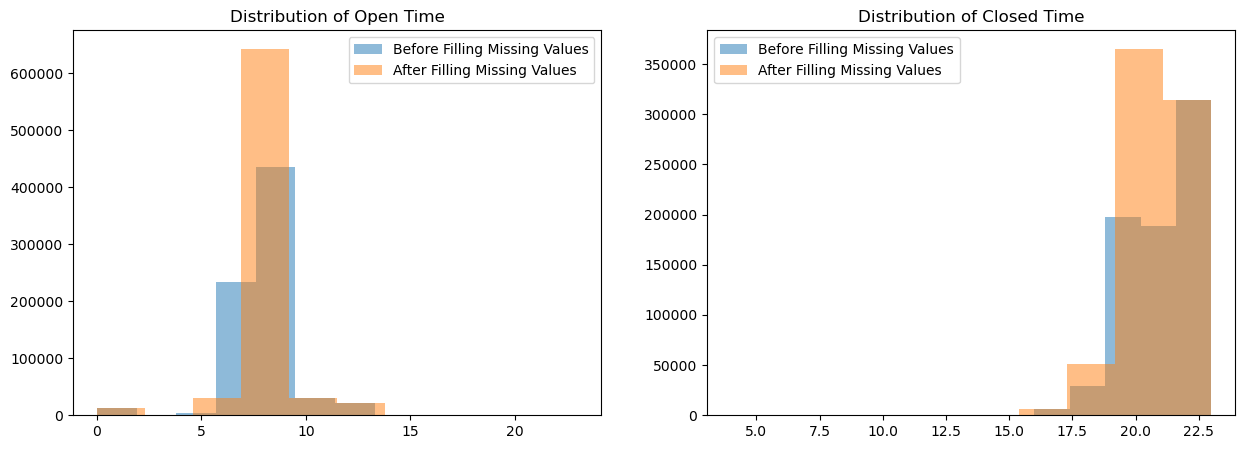

In [15]:
# plot distribution of the opening and closing
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.hist(open_time_before, alpha=0.5, label='Before Filling Missing Values')
plt.hist(open_time_after_interpolate, alpha=0.5, label='After Filling Missing Values')
plt.title('Distribution of Open Time')
plt.legend()


plt.subplot(1, 2, 2)
plt.hist(closed_time_before, alpha=0.5, label='Before Filling Missing Values')
plt.hist(closed_time_after_interpolate, alpha=0.5, label='After Filling Missing Values')
plt.title('Distribution of Closed Time')
plt.legend()
plt.show()

## Use median to fill the missing values.

In [16]:
df_median = df.copy()

In [17]:
# Find the median values of datetime_store_open and datetime_store_closed
median_values = df_median.groupby(['store_hashed', 'store_format', 'zipcode_region', 'region'])[['datetime_store_open', 'datetime_store_closed']].transform('median')

# Fill missing values with the calculated median values
df_median['datetime_store_open'].fillna(median_values['datetime_store_open'], inplace=True)
df_median['datetime_store_closed'].fillna(median_values['datetime_store_closed'], inplace=True)

In [18]:
df_median.isna().sum()


sales_date                        0
store_hashed                      0
n_transactions                    0
store_format                      0
zipcode_region                    0
region                            0
holiday_saint_nicholas            0
holiday_first_christmas           0
holiday_liberation_day            0
holiday_good_friday               0
holiday_new_years_day             0
holiday_mothers_day               0
holiday_fathers_day               0
holiday_carnaval                  0
holiday_easter                    0
holiday_pentecost                 0
holiday_kings_day_netherlands     0
holiday_all_saints_day            0
holiday_penance_and_prayer_day    0
holiday_german_unity_day          0
holiday_labour_day                0
holiday_reform_day                0
holiday_maria_ascension           0
holiday_national_belgium_day      0
holiday_lord_ascension            0
holiday_rosenmontag               0
holiday_sacraments_day            0
holiday_st_march_day        

In [19]:
open_time_median = df_median['datetime_store_open'].dt.hour
closed_time_median = df_median['datetime_store_closed'].dt.hour

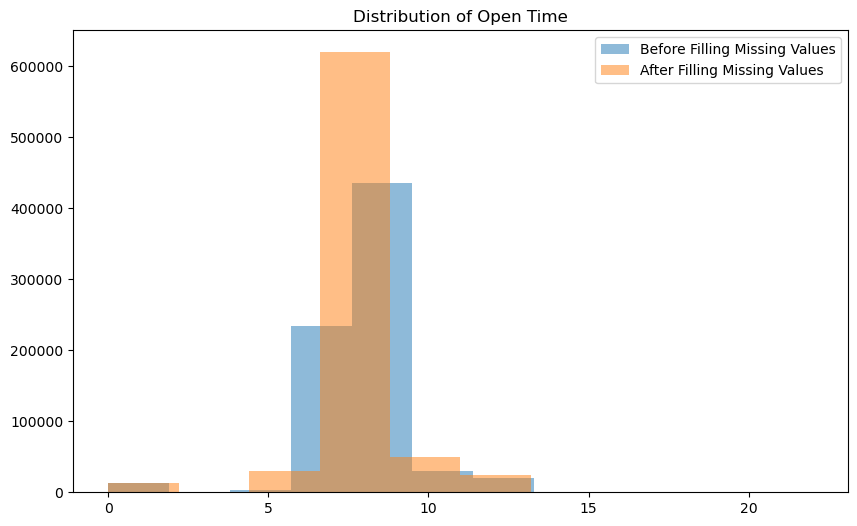

In [20]:
# plot distribution of the closed time in the same plot
plt.figure(figsize=(10, 6))
plt.hist(open_time_before, alpha=0.5, label='Before Filling Missing Values')
plt.hist(open_time_median, alpha=0.5, label='After Filling Missing Values')
plt.title('Distribution of Open Time')
plt.legend()
plt.show()


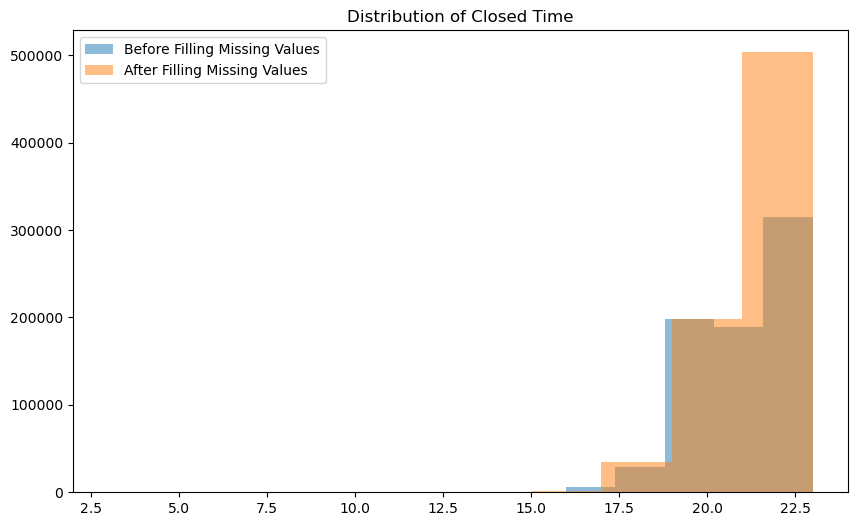

In [21]:
# for the closed time
plt.figure(figsize=(10, 6))
plt.hist(closed_time_before, alpha=0.5, label='Before Filling Missing Values')
plt.hist(closed_time_median, alpha=0.5, label='After Filling Missing Values')
plt.title('Distribution of Closed Time')
plt.legend()
plt.show()

Both methods are giving similar results. We will use the median method to fill the missing values, because the distribution of the closed times is more similar to the original distribution.

## Feature Engineering
We will create the following features, that might be interesting for the forecasting and for the EDA:

1. Now that we have filled the missing values of the datetime_store_open and datetime_store_closed, 
we can create a new feature `working_hours` which is the difference between the `datetime_store_closed` and `datetime_store_open` and it is the working hours of the store per day.

2. Also, we can use the holidays columns to create a new feature `is_holidays` which is 1 if there is a holiday that day and 0 if there is not.


In [22]:
df = df_median.copy()

In [23]:
# Create a feature for the working hours of each store.
df['working_hours'] = (df['datetime_store_closed'] - df['datetime_store_open']).apply(lambda x: x.seconds/3600)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737432 entries, 0 to 737431
Data columns (total 39 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   sales_date                      737432 non-null  datetime64[ns]
 1   store_hashed                    737432 non-null  string        
 2   n_transactions                  737432 non-null  Int32         
 3   store_format                    737432 non-null  Int32         
 4   zipcode_region                  737432 non-null  string        
 5   region                          737432 non-null  string        
 6   holiday_saint_nicholas          737432 non-null  Int32         
 7   holiday_first_christmas         737432 non-null  Int32         
 8   holiday_liberation_day          737432 non-null  Int32         
 9   holiday_good_friday             737432 non-null  Int32         
 10  holiday_new_years_day           737432 non-null  Int32  

In [25]:
# Create a feature is_holiday to indicate if a day is a holiday or not
df['is_holiday'] = np.where(df.iloc[:, 6:36].any(axis=1), 1, 0)

# drop the leftover holiday columns
holiday_columns = df.columns[6:36]
# drop the holiday columns
df.drop(holiday_columns, axis=1, inplace=True)


In [26]:
df.sample(10)

,sales_date,store_hashed,n_transactions,store_format,zipcode_region,region,datetime_store_open,datetime_store_closed,working_hours,is_holiday
566043,2020-06-10,647a8664e3a3d945c87db2d07a6590c1,11058,19,10,north,2020-06-10 07:00:00,2020-06-10 22:00:00,15.0,0
88637,2022-11-18,4dcae38ee11d3a6606cc6cd636a3628b,5418,19,10,north,2022-11-18 08:00:00,2022-11-18 22:00:00,14.0,0
208815,2019-07-01,6dcb94fb55921f2416219b454651bffc,3356,19,97,north,2019-07-01 08:00:00,2019-07-01 21:00:00,13.0,0
11474,2022-03-07,328e5d4c166bb340b314d457a208dc83,4409,19,71,middle,2022-03-07 08:00:00,2022-03-07 21:00:00,13.0,0
468589,2022-02-01,c667d53acd899a97a85de0c201ba99be,1048,19,45,south,2022-02-01 07:00:00,2022-02-01 22:00:00,15.0,0
56674,2022-04-27,95d309f0b035d97f69902e7972c2b2e6,619,19,15,north,2022-04-27 08:00:00,2022-04-27 21:00:00,13.0,1
297029,2019-06-27,7895fc13088ee37f511913bac71fa66f,1260,19,35,middle,2019-06-27 08:00:00,2019-06-27 22:00:00,14.0,0
216578,2021-09-05,5938b4d054136e5d59ada6ec9c295d7a,3038,19,30,middle,2021-09-05 08:00:00,2021-09-05 22:00:00,14.0,0
451023,2021-05-07,43dd49b4fdb9bede653e94468ff8df1e,4940,19,12,north,2021-05-07 07:00:00,2021-05-07 22:00:00,15.0,1
102497,2022-09-05,83adc9225e4deb67d7ce42d58fe5157c,4465,19,74,north,2022-09-05 08:00:00,2022-09-05 21:00:00,13.0,0


In [27]:
df.isna().sum()

sales_date               0
store_hashed             0
n_transactions           0
store_format             0
zipcode_region           0
region                   0
datetime_store_open      0
datetime_store_closed    0
working_hours            0
is_holiday               0
dtype: int64

In [28]:
# save the preprocessed data
df.to_parquet('n_forecast_preprocessed.parquet', engine='pyarrow', compression='snappy', index=False)

# Exploratory Data Analysis (EDA)

In [29]:
# Load the preprocessed data
df = pd.read_parquet('n_forecast_preprocessed.parquet', engine='pyarrow', dtype_backend='numpy_nullable')

In [33]:
df.n_transactions.describe()

count       737432.0
mean     4891.466767
std      3520.901502
min              3.0
25%           2280.0
50%           4196.0
75%           6680.0
max          39322.0
Name: n_transactions, dtype: Float64

The average number of transactions is ~4891.5, the min are 3 and maximum 39.322

In [34]:
# Summary statistics of the number of transactions for each store format and region
df.groupby(['store_format', 'region'])['n_transactions'].describe().sort_values(by='store_format')

count         mean          std   min      25%   
store_format region                                                      
6            middle   12287.0  4084.084317  2668.128586  20.0   1778.0  \
             north     8120.0  3573.549384  3012.034007  70.0  1547.75   
             south    19297.0  3364.726227  2322.286486  27.0   1465.0   
16           middle   27512.0   2266.53224  2414.103093   7.0    829.0   
             north    38048.0  2366.440233  2516.204662  13.0    803.0   
             south     9997.0  4753.730019   4935.94497  10.0    937.0   
19           middle  205238.0  5405.878146  3263.645661   4.0   3076.0   
             north   254183.0  5204.774784  3575.654184   3.0   2597.0   
             south   138232.0  4522.964408  2737.595865   6.0   2394.0   
20           middle    8044.0  9249.700646  6975.505924  17.0   3475.0   
             north     7278.0  6510.432811  5404.402188  11.0  1552.25   
             south     9196.0  9092.607221  4940.729589  32.0   4902.0   

                        50%       75%      max  
store_format region                             
6            middle  3683.0    6033.5  16471.0  
             north   2838.0   4401.75  17812.0  
             south   3105.0    4831.0  23170.0  
16           middle  1590.0    2921.0  18443.0  
             north   1529.0    2999.0  28426.0  
             south   2198.0    7934.0  33382.0  
19           middle  5069.0    7181.0  39322.0  
             north   4325.0    7036.5  36049.0  
             south   4072.0    6214.0  27081.0  
20           middle  7817.5   12126.5  36802.0  
             north   5392.5   9394.25  28207.0  
             south   7317.5  13306.75  27385.0

The above table shows some summary statistics about the number of `n_transactions` by `store_format` and `region`.

From the above tables, we can observe the following:
* The store_format 20 has the biggest number of transactions. Maybe because store_format 20 are the AlbertHeijn XL stores.
* And most probably, the store_format 19 are the most common AH stores.

## Create new Features for EDA
We can easily create some additional features in the dataset, that will help us to understand the data better, and provide answers to simple questions.

For example:
1. What is the average number of working hours per day?
2. Which day of the week has the most transactions?
3. Which month? 
4. Which year?


In [35]:
# Create a feature for the working hours of each store.
df['working_hours'] = (df['datetime_store_closed'] - df['datetime_store_open']).apply(lambda x: x.seconds/3600)

# Create a day_of_week column
df['day_of_week'] = df['sales_date'].dt.day_name()

# Month of the year column
df['month_of_year'] = df['sales_date'].dt.month_name()

# Year
df['year'] = df['sales_date'].dt.year

In [36]:
# Some statistics about the open hours 
df.groupby(['store_format', 'region'])['working_hours'].describe().sort_values(by='store_format')

count       mean       std  min    25%   50%    75%   
store_format region                                                           
6            middle   12287.0  12.233377  2.135304  4.0  12.00  12.0  13.00  \
             north     8120.0  12.316195  1.636760  4.0  12.00  12.0  13.00   
             south    19297.0  11.999870  1.852132  1.0  12.00  12.0  13.00   
16           middle   27512.0  17.559281  5.082053  4.0  13.50  16.5  23.95   
             north    38048.0  14.430772  3.543893  3.0  12.50  14.0  16.50   
             south     9997.0  15.648461  3.322056  3.0  14.50  16.0  17.00   
19           middle  205238.0  13.237793  1.952293  4.0  13.00  14.0  14.75   
             north   254183.0  13.190579  1.772146  1.0  13.00  14.0  14.00   
             south   138232.0  12.691827  1.593549  3.0  12.00  13.0  14.00   
20           middle    8044.0  13.788186  2.202710  5.0  13.00  14.0  15.00   
             north     7278.0  14.031899  1.257727  6.0  13.75  14.0  15.00   
             south     9196.0  13.395090  1.974903  4.0  13.00  14.0  15.00   

                           max  
store_format region             
6            middle  15.000000  
             north   15.000000  
             south   15.000000  
16           middle  23.983333  
             north   23.983333  
             south   23.983333  
19           middle  16.983333  
             north   18.750000  
             south   16.983333  
20           middle  16.983333  
             north   17.750000  
             south   18.500000

The above table shows some summary statistics about the number of `working_hours` by `store_format` and `region`.
* The store_format 16 has the most working hours on average, maybe because store_format 16 are the AlbertHeijn to Go which is open 24/7 in most cases(?).

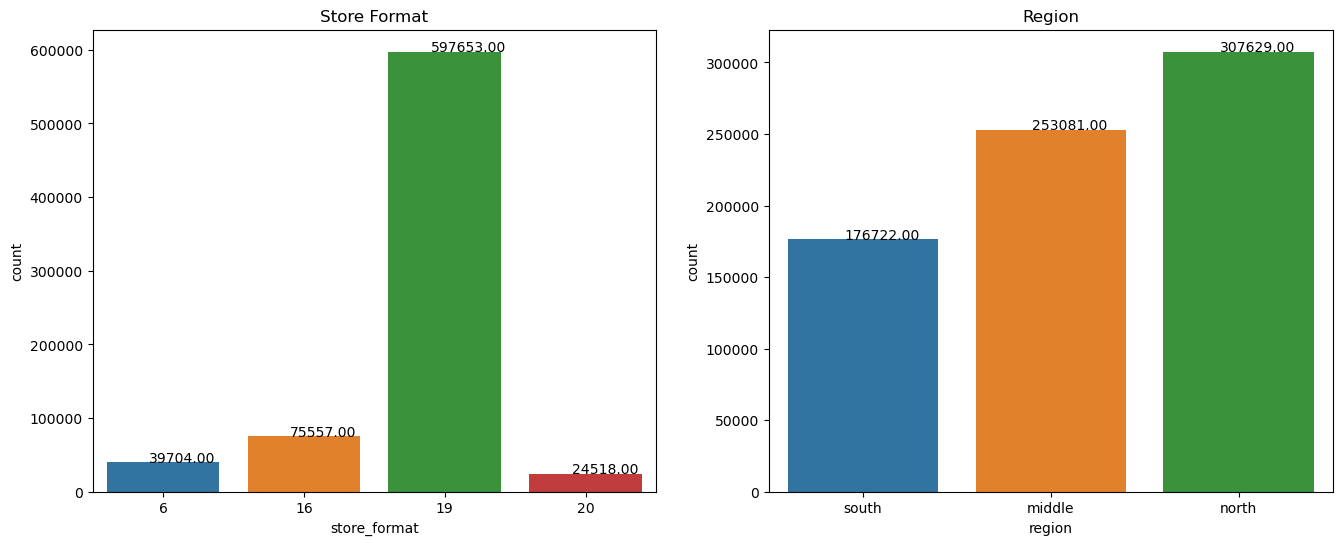

In [37]:
# Plot the n_transactions for each store format and region
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='store_format', data=df)
for p in plt.gca().patches:
    plt.gca().annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+10))
plt.title('Store Format')


plt.subplot(1, 2, 2)
sns.countplot(x='region', data=df)
for p in plt.gca().patches:
    plt.gca().annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+10))
plt.title('Region')

plt.show()


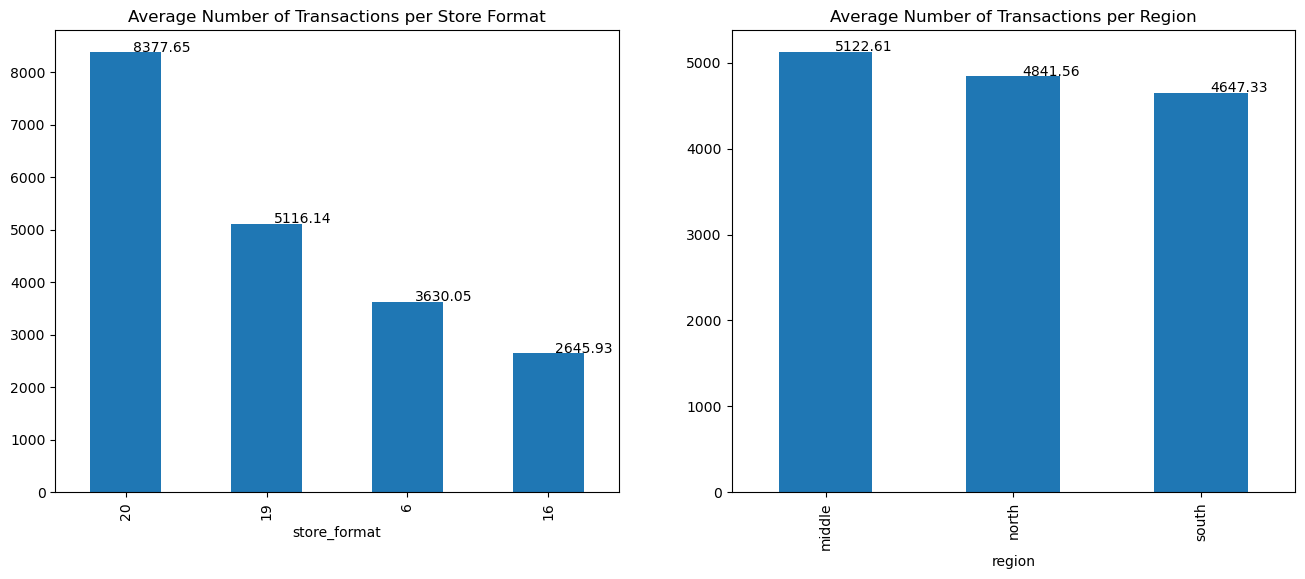

In [59]:
# Plot the average number of transactions per store format
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
df.groupby(['store_format'])['n_transactions'].mean().sort_values(ascending=False).plot(kind='bar', title='Average Number of Transactions per Store Format')
for p in plt.gca().patches:
    plt.gca().annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+10))



# Plot the average number of transactions per region
plt.subplot(1, 2, 2)
df.groupby(['region'])['n_transactions'].mean().sort_values(ascending=False).plot(kind='bar', title='Average Number of Transactions per Region')
for p in plt.gca().patches:
    plt.gca().annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+10))
plt.show()


In [38]:
# Find the store with the most n_transactions
df[df['n_transactions'] == df['n_transactions'].max()]

,sales_date,store_hashed,n_transactions,store_format,zipcode_region,region,datetime_store_open,datetime_store_closed,working_hours,is_holiday,day_of_week,month_of_year,year
543901,2022-06-04,4b4edc2630fe75800ddc29a7b4070add,39322,19,35,middle,2022-06-04 07:00:00,2022-06-04 23:58:00,16.966667,0,Saturday,June,2022


In [39]:
# find the top ten stores with the most n_transactions
df.groupby(['sales_date', 'store_hashed', 'store_format', 'zipcode_region', 'region'])['n_transactions'].sum().sort_values(ascending=False).head(10)

sales_date  store_hashed                      store_format  zipcode_region  region
2022-06-04  4b4edc2630fe75800ddc29a7b4070add  19            35              middle    39322
2020-03-13  9327969053c0068dd9e07c529866b94d  20            25              middle    36802
2019-10-24  7bccfde7714a1ebadf06c5f4cea752c1  19            97              north     36049
2019-10-29  7bccfde7714a1ebadf06c5f4cea752c1  19            97              north     35687
2019-10-22  7bccfde7714a1ebadf06c5f4cea752c1  19            97              north     35452
2022-04-26  4b4edc2630fe75800ddc29a7b4070add  19            35              middle    34753
2019-10-26  7bccfde7714a1ebadf06c5f4cea752c1  19            97              north     34485
2019-10-28  7bccfde7714a1ebadf06c5f4cea752c1  19            97              north     34239
2019-10-25  7bccfde7714a1ebadf06c5f4cea752c1  19            97              north     34080
2019-10-18  7bccfde7714a1ebadf06c5f4cea752c1  19            97              north     340

In [40]:
# Show which day of the week has the most n_transactions
df.groupby(['year', 'day_of_week'])['n_transactions'].describe().sort_values(by='year', ascending=False)

count         mean          std   min      25%     50%   
year day_of_week                                                             
2022 Wednesday    29867.0   4845.99538  3586.220116  31.0   2068.5  4107.0  \
     Tuesday      29900.0  4771.400602  3579.982944   7.0   2057.0  4015.5   
     Thursday     29856.0  4815.416968   3582.18185  14.0   2087.0  4074.0   
     Sunday       27322.0  3893.069541  3078.456615  33.0  1602.25  3225.0   
     Saturday     29935.0   5249.10329   3882.47917   9.0   2219.0  4554.0   
     Monday       29761.0  4809.788616  3608.841465  12.0   2017.0  4050.0   
     Friday       29900.0  5258.518696  3854.806623  14.0   2252.0  4518.0   
2021 Monday       26093.0  4651.356149  3205.884095   5.0   2263.0  4083.0   
     Wednesday    26144.0  4749.972957   3205.26891   3.0   2361.0  4189.0   
     Tuesday      26136.0  4579.763851  3134.765116   4.0   2255.0  4010.0   
     Thursday     26139.0  4769.959295   3252.03602  20.0   2349.5  4192.0   
     Sunday       23822.0   3750.39304  2787.432462  24.0   1712.0  3172.5   
     Saturday     25726.0   5318.63224  3600.409966  12.0   2543.0  4799.0   
     Friday       26505.0  5301.335333  3595.053505  15.0   2572.0  4732.0   
2020 Wednesday    25846.0  4747.944324   3255.49494  12.0   2367.5  4180.0   
     Tuesday      25560.0  4607.093818  3182.958092   6.0   2291.0  4047.0   
     Thursday     26041.0  4760.422641  3269.922812  11.0   2372.0  4196.0   
     Sunday       23111.0  3637.834192  2781.139427  10.0   1628.0  3047.0   
     Saturday     25280.0  5334.198655  3645.961995  11.0  2579.75  4782.5   
     Monday       25481.0  4668.410384  3255.047726   6.0   2280.0  4086.0   
     Friday       25386.0   5287.87627  3600.678083   9.0  2607.25  4685.0   
2019 Monday       25297.0  5370.037356  3766.115004   7.0   2689.0  4580.0   
     Wednesday    25217.0  5311.200857  3658.107259  10.0   2679.0  4585.0   
     Tuesday      25528.0  5251.102319  3703.074263   7.0   2651.0  4442.0   
     Thursday     25353.0  5241.882184  3664.785967   8.0   2660.0  4503.0   
     Sunday       21699.0  4051.055625   3091.15289  10.0   1880.0  3344.0   
     Saturday     25085.0  5858.375125  4003.720612  15.0   2879.0  5233.0   
     Friday       25442.0  5790.802688   3916.49961   4.0   2936.0  5101.0   

                      75%      max  
year day_of_week                    
2022 Wednesday     6727.0  32299.0  
     Tuesday      6588.25  34753.0  
     Thursday      6651.0  25788.0  
     Sunday        5339.0  27081.0  
     Saturday      7363.0  39322.0  
     Monday        6698.0  25139.0  
     Friday       7336.25  31108.0  
2021 Monday        6371.0  25094.0  
     Wednesday     6513.0  26757.0  
     Tuesday       6236.0  24498.0  
     Thursday      6475.0  31743.0  
     Sunday        5007.0  24729.0  
     Saturday     7254.75  25510.0  
     Friday        7241.0  32971.0  
2020 Wednesday    6413.75  27915.0  
     Tuesday       6218.0  26816.0  
     Thursday      6378.0  27941.0  
     Sunday        4846.0  28929.0  
     Saturday     7237.25  30599.0  
     Monday        6320.0  29257.0  
     Friday       7146.75  36802.0  
2019 Monday        7167.0  34239.0  
     Wednesday     7116.0  32452.0  
     Tuesday      6974.25  35687.0  
     Thursday      6947.0  36049.0  
     Sunday        5370.0  26908.0  
     Saturday      7844.0  34485.0  
     Friday       7748.75  34080.0

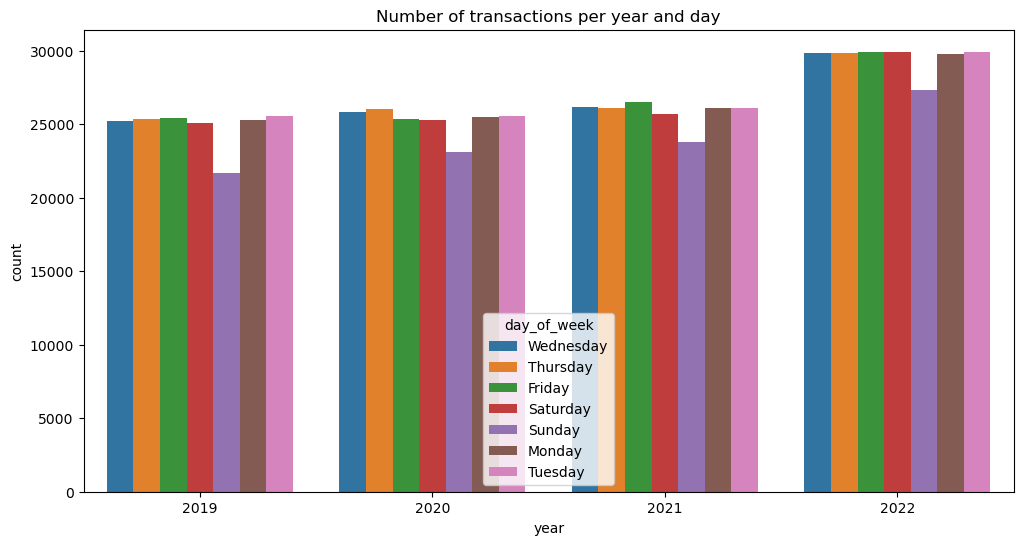

In [41]:
# Plot the Average Number of transactions per year and day
plt.figure(figsize=(12, 6))
sns.countplot(x='year', hue='day_of_week', data=df)
plt.title('Number of transactions per year and day')
plt.show()


In [42]:
# Show which day of the week has the most n_transactions
df.groupby(['month_of_year'])['n_transactions'].sum().sort_values(ascending=True)

month_of_year
February     272299182
April        286596046
January      286945787
March        301386645
May          302750673
July         302926816
June         303408446
August       303772364
November     306959861
September    310423661
December     314254777
October      315399863
Name: n_transactions, dtype: Int32

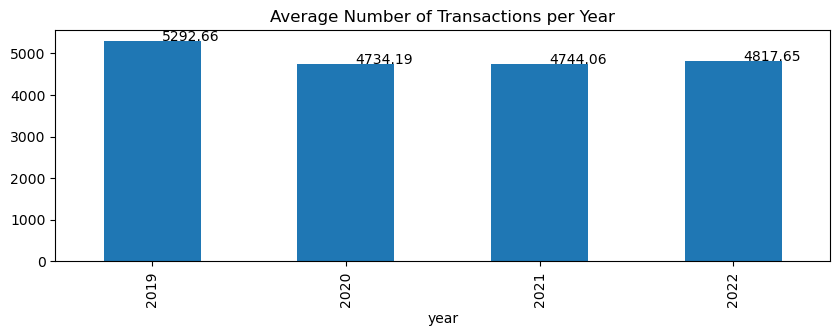

In [43]:
# Plot the average number of transactions per year
plt.figure(figsize=(10, 3))
df.groupby(['year'])['n_transactions'].mean().plot(kind='bar', title='Average Number of Transactions per Year')
for p in plt.gca().patches:
    plt.gca().annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+10))
plt.show()

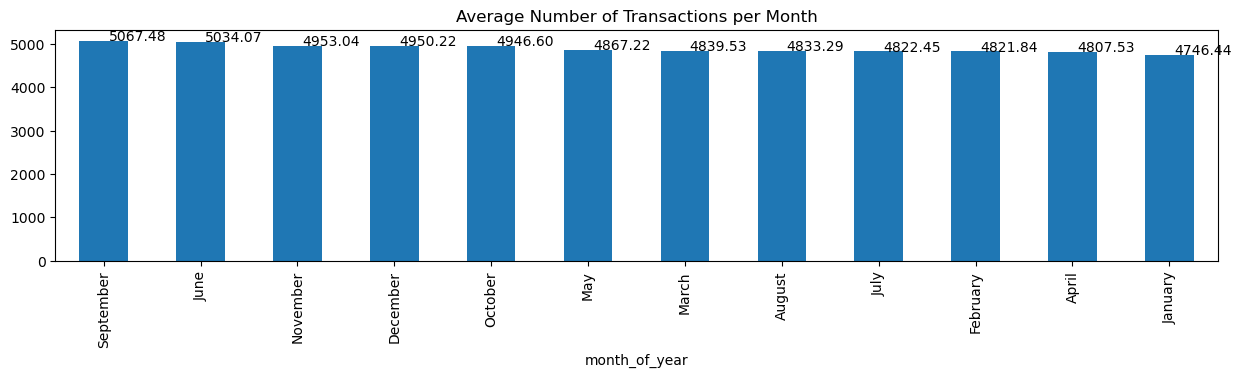

In [44]:
# Plot the average number of transactions per month
plt.figure(figsize=(15, 3))
df.groupby(['month_of_year'])['n_transactions'].mean().sort_values(ascending=False).plot(kind='bar', title='Average Number of Transactions per Month')
for p in plt.gca().patches:
    plt.gca().annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+10))
plt.show()

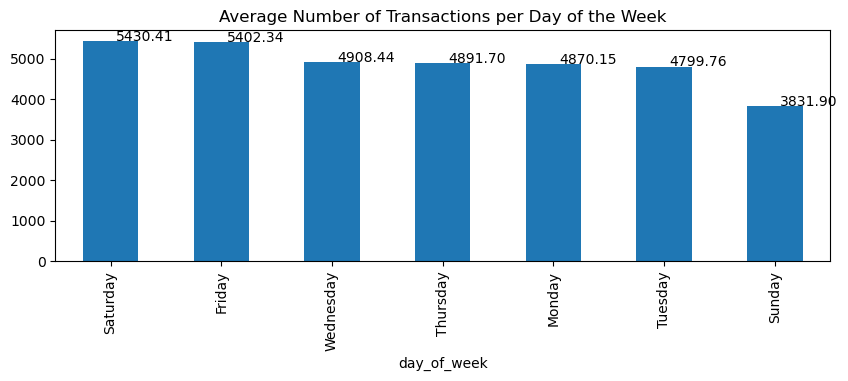

In [45]:
# Plot the average number of transactions per day of the week sorted by the average number of transactions
plt.figure(figsize=(10, 3))
df.groupby(['day_of_week'])['n_transactions'].mean().sort_values(ascending=False).plot(kind='bar', title='Average Number of Transactions per Day of the Week')
for p in plt.gca().patches:
    plt.gca().annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+10))
plt.show()


In [46]:
# Show the average number of transactions on holidays and non-holidays
df.groupby(['is_holiday'])['n_transactions'].describe().sort_values(by='is_holiday', ascending=False)


,count,mean,std,min,25%,50%,75%,max
is_holiday,,,,,,,,
1,256677.0,4775.583348,3434.479722,3.0,2217.0,4113.0,6527.0,36049.0
0,480755.0,4953.337384,3564.646207,4.0,2314.0,4241.0,6764.0,39322.0


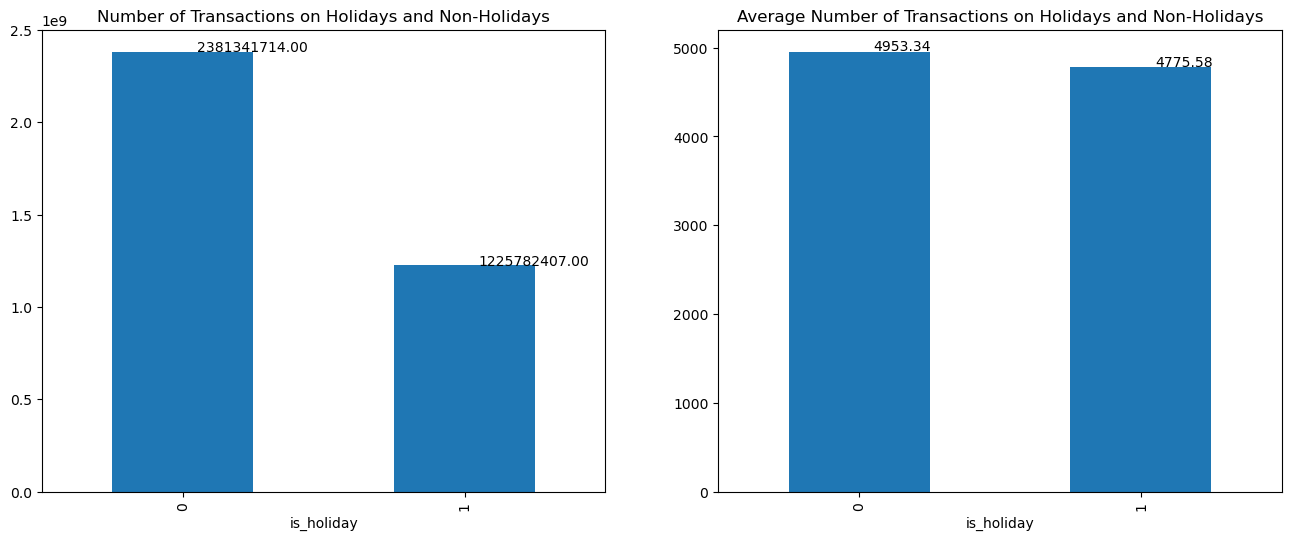

In [64]:
# Plot the number of transactions on holidays and non-holidays
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
df.groupby(['is_holiday'])['n_transactions'].sum().sort_values(ascending=False).plot(kind='bar', title='Number of Transactions on Holidays and Non-Holidays')
for p in plt.gca().patches:
    plt.gca().annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+10))
plt.title('Number of Transactions on Holidays and Non-Holidays')

# Plot the average number of transactions on holidays and non-holidays
plt.subplot(1, 2, 2)
df.groupby(['is_holiday'])['n_transactions'].mean().sort_values(ascending=False).plot(kind='bar', title='Average Number of Transactions on Holidays and Non-Holidays')
for p in plt.gca().patches:
    plt.gca().annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+10))
plt.show()